# Import all the libraries here

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Load data here

In [2]:
data = pd.read_csv("../data/financial_data_clean.csv")
df = data.copy()

# Exploratory Data Analysis

In [3]:
df.head(4)

,Unnamed: 0,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,sp_close,Volume
0,0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1498.579956,1.227400e+09
1,1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1505.969971,1.021700e+09
2,2,2000-04-04,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,27.12,25.46,1494.729980,1.515460e+09
3,3,2000-04-05,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,28.41,25.76,1487.369995,1.110300e+09


In [4]:
# drop Unnamed and rename Volume -> volume and move target to the end
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df = df.rename(columns={"Volume" : "volume"})

In [6]:
target = df.pop("sp_close")
df["sp_close"] = target

In [7]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971


# Add Categorical Columns

## Add year and month

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.loc[:, "month"] = df["date"].dt.strftime("%b")
df.loc[:, "year"] = df["date"].dt.year

## Percentage change

In [10]:
def change_to_percentage(column):
    new_column = column.pct_change() * 100 # convert_to_percentage
    return new_column

columns = ["inflation", "gdp", "m2_money_supp", "exports", "imports", "new_home_const", "wti", "sp_close"]
new_columns = ["inflation_pct_change", "gdp_pct_change", "m2_money_supp_pct_change", "exports_pct_change", 
               "imports_pct_change", "new_home_const_pct_change", "wti_pct_change", "sp_close_pct_change"]
for i in range(len(columns)):
    df.loc[:, new_columns[i]] = change_to_percentage(df[columns[i]])

In [11]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956,Apr,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134


In [12]:
df.fillna(0, inplace=True)

In [13]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134


## Other categories

In [14]:
# market trend
def market_trend(change):
    if change > 2:
        return "Bullish"
    elif change < -2:
        return "Bearish"
    else:
        return "Neutral"

# economic cycle
def economic_cycle(gdp_growth):
    if gdp_growth > 0.8:
        return "Boom"
    elif 0 < gdp_growth <= 0.8:
        return "Expansion"
    elif -0.2 < gdp_growth <= 0:
        return "Slowdown"
    else:
        return "Recession"

# inflation category
def inflation_category(inflation):
    if inflation < 0.10:
        return "Low"
    elif 0.10 <= inflation < 0.25:
        return "Moderate"
    else:
        return "High"

# fed interest rate category
def interest_rate_category(rate):
    if rate < 2:
        return "Dovish"  # Lower rates
    elif 2 <= rate < 4:
        return "Neutral"
    else:
        return "Hawkish"  # Higher rates

# global crisis period
def crisis_period(date):
    if date.year in [2008, 2009, 2010]:  
        return "Financial Crisis"
    elif date.year in [2020, 2021]:
        return "COVID-19"
    elif date.year in [2022, 2023, 2024]:
        return "Russia-Ukraine crisis"
    else:
        return "Stable"

In [15]:
df.loc[:, 'market_trend'] = df['sp_close_pct_change'].apply(market_trend)
df.loc[:, 'economic_cycle'] = df['gdp_pct_change'].apply(economic_cycle)
df.loc[:, 'inflation_category'] = df['inflation_pct_change'].apply(inflation_category)
df.loc[:, 'interest_rate_category'] = df['fed_int_rate'].apply(interest_rate_category)
df.loc[:, 'crisis_period'] = df['date'].apply(crisis_period)

In [16]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134,Neutral,Slowdown,Low,Hawkish,Stable


## Create Quarters

In [17]:
df.loc[:, 'quarter'] = df['date'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})

In [18]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q2
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134,Neutral,Slowdown,Low,Hawkish,Stable,Q2


In [19]:
df.shape

(6603, 33)

In [20]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,1498.579956,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q2
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,1505.969971,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134,Neutral,Slowdown,Low,Hawkish,Stable,Q2


## Simple statistics of the final data

In [21]:
target1 = df.pop("sp_close_pct_change")
df["sp_close_pct_change"] = target1

In [22]:
target2 = df.pop("sp_close")
df["sp_close"] = target2

In [23]:
df.head(2)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter,sp_close_pct_change,sp_close
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q2,0.000000,1498.579956
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Neutral,Slowdown,Low,Hawkish,Stable,Q2,0.493134,1505.969971


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       6603 non-null   datetime64[ns]
 1   inflation                  6603 non-null   float64       
 2   unemployment               6603 non-null   float64       
 3   gdp                        6603 non-null   float64       
 4   fed_int_rate               6603 non-null   float64       
 5   ten_year_yield             6603 non-null   float64       
 6   m2_money_supp              6603 non-null   float64       
 7   consum_sent_idx            6603 non-null   float64       
 8   indus_pro_idx              6603 non-null   float64       
 9   exports                    6603 non-null   float64       
 10  imports                    6603 non-null   float64       
 11  new_home_const             6603 non-null   float64       
 12  mortga

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,6603,2012-09-26 06:04:11.885506560,2000-04-01 00:00:00,2006-06-29 12:00:00,2012-09-26 00:00:00,2018-12-24 12:00:00,2025-03-25 00:00:00,NaN
inflation,6603.0,231.344787,170.9,201.8,231.015,252.767,319.775,38.59833
unemployment,6603.0,5.696108,3.4,4.2,5.1,6.5,14.8,1.955514
gdp,6603.0,17558.412496,10247.72,13753.424,16319.541,20798.73,29719.647,5299.640396
fed_int_rate,6603.0,1.904763,0.05,0.14,1.21,3.5,6.54,1.997742
ten_year_yield,6603.0,3.262459,0.52,2.2,3.31,4.27,6.57,1.270504
m2_money_supp,6603.0,11525.193912,4755.7,6852.1,10216.6,14369.9,21724.3,5362.802677
consum_sent_idx,6603.0,82.493942,50.0,72.3,84.1,93.0,110.7,12.987673
indus_pro_idx,6603.0,97.382395,84.6746,92.9347,98.7315,101.7435,104.2062,5.00165
exports,6603.0,2019.451487,953.52,1459.767,2181.957,2416.181,3220.292,655.51245


In [26]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025], dtype=int32)

# Univariate Analysis

In [27]:
# numerical data
num = df._get_numeric_data()

In [28]:
# categorical data
cat = df.drop(columns=num.columns)

In [29]:
num = num.drop(columns=["year"])

## Analysis of Numerical Data

### Histogram of columns

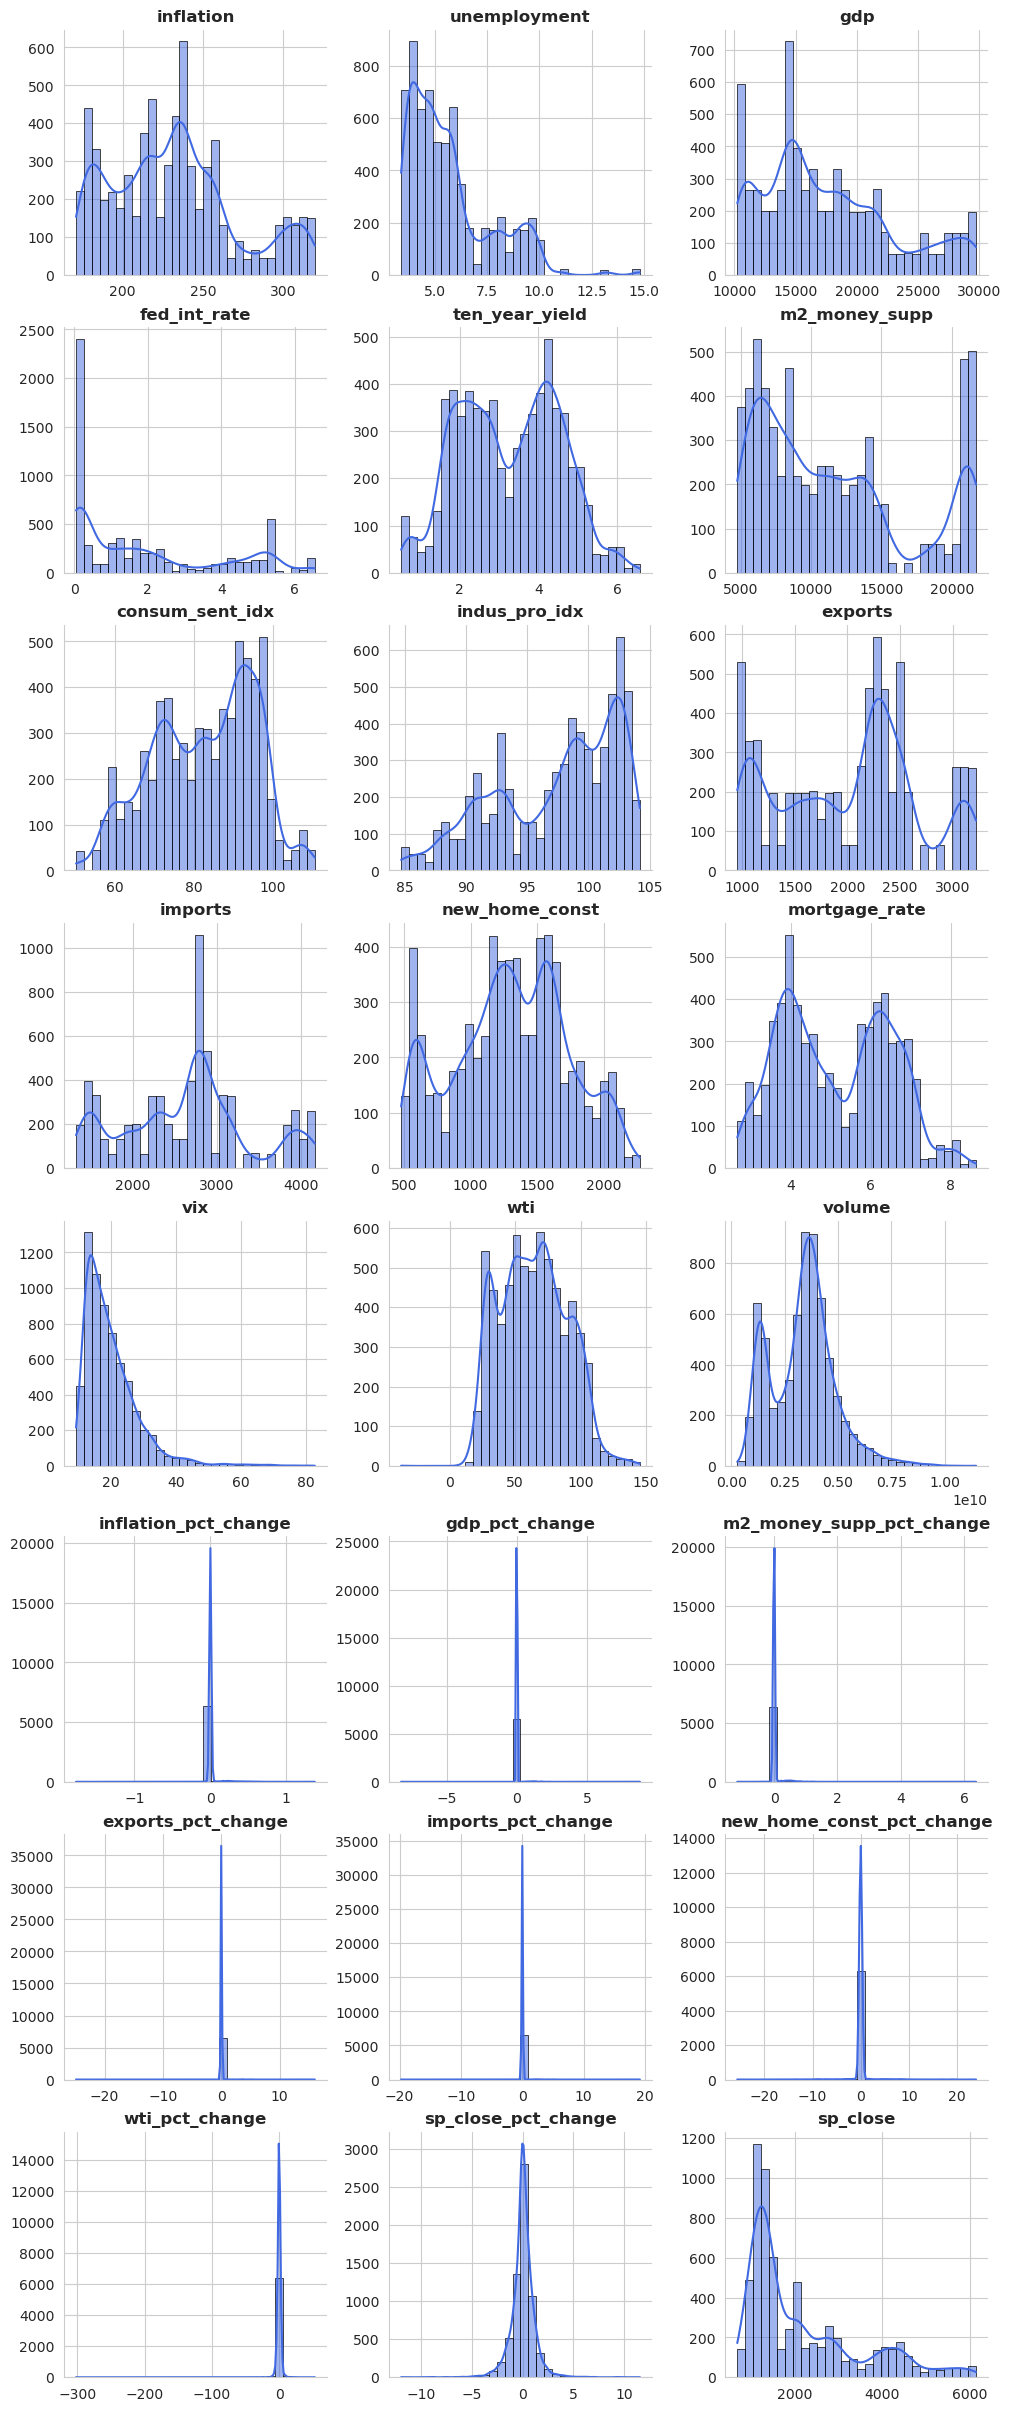

In [30]:
# Set Seaborn style for a clean, professional look
sns.set_style("whitegrid")

# Define grid layout (5 columns per row)
num_cols = 3
num_rows = -(-len(num.columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 3), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num.columns):
    ax = axes[i]
    sns.histplot(num[col], kde=True, bins=30, color='royalblue', edgecolor='black', ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show plot
plt.show()

### Some line plots

In [31]:
num.columns

Index(['inflation', 'unemployment', 'gdp', 'fed_int_rate', 'ten_year_yield',
       'm2_money_supp', 'consum_sent_idx', 'indus_pro_idx', 'exports',
       'imports', 'new_home_const', 'mortgage_rate', 'vix', 'wti', 'volume',
       'inflation_pct_change', 'gdp_pct_change', 'm2_money_supp_pct_change',
       'exports_pct_change', 'imports_pct_change', 'new_home_const_pct_change',
       'wti_pct_change', 'sp_close_pct_change', 'sp_close'],
      dtype='object')

In [32]:
line_columns = ['inflation', 'unemployment', 'gdp', 'm2_money_supp', 'exports',
       'imports', 'new_home_const', 'wti', 'volume', 'sp_close']

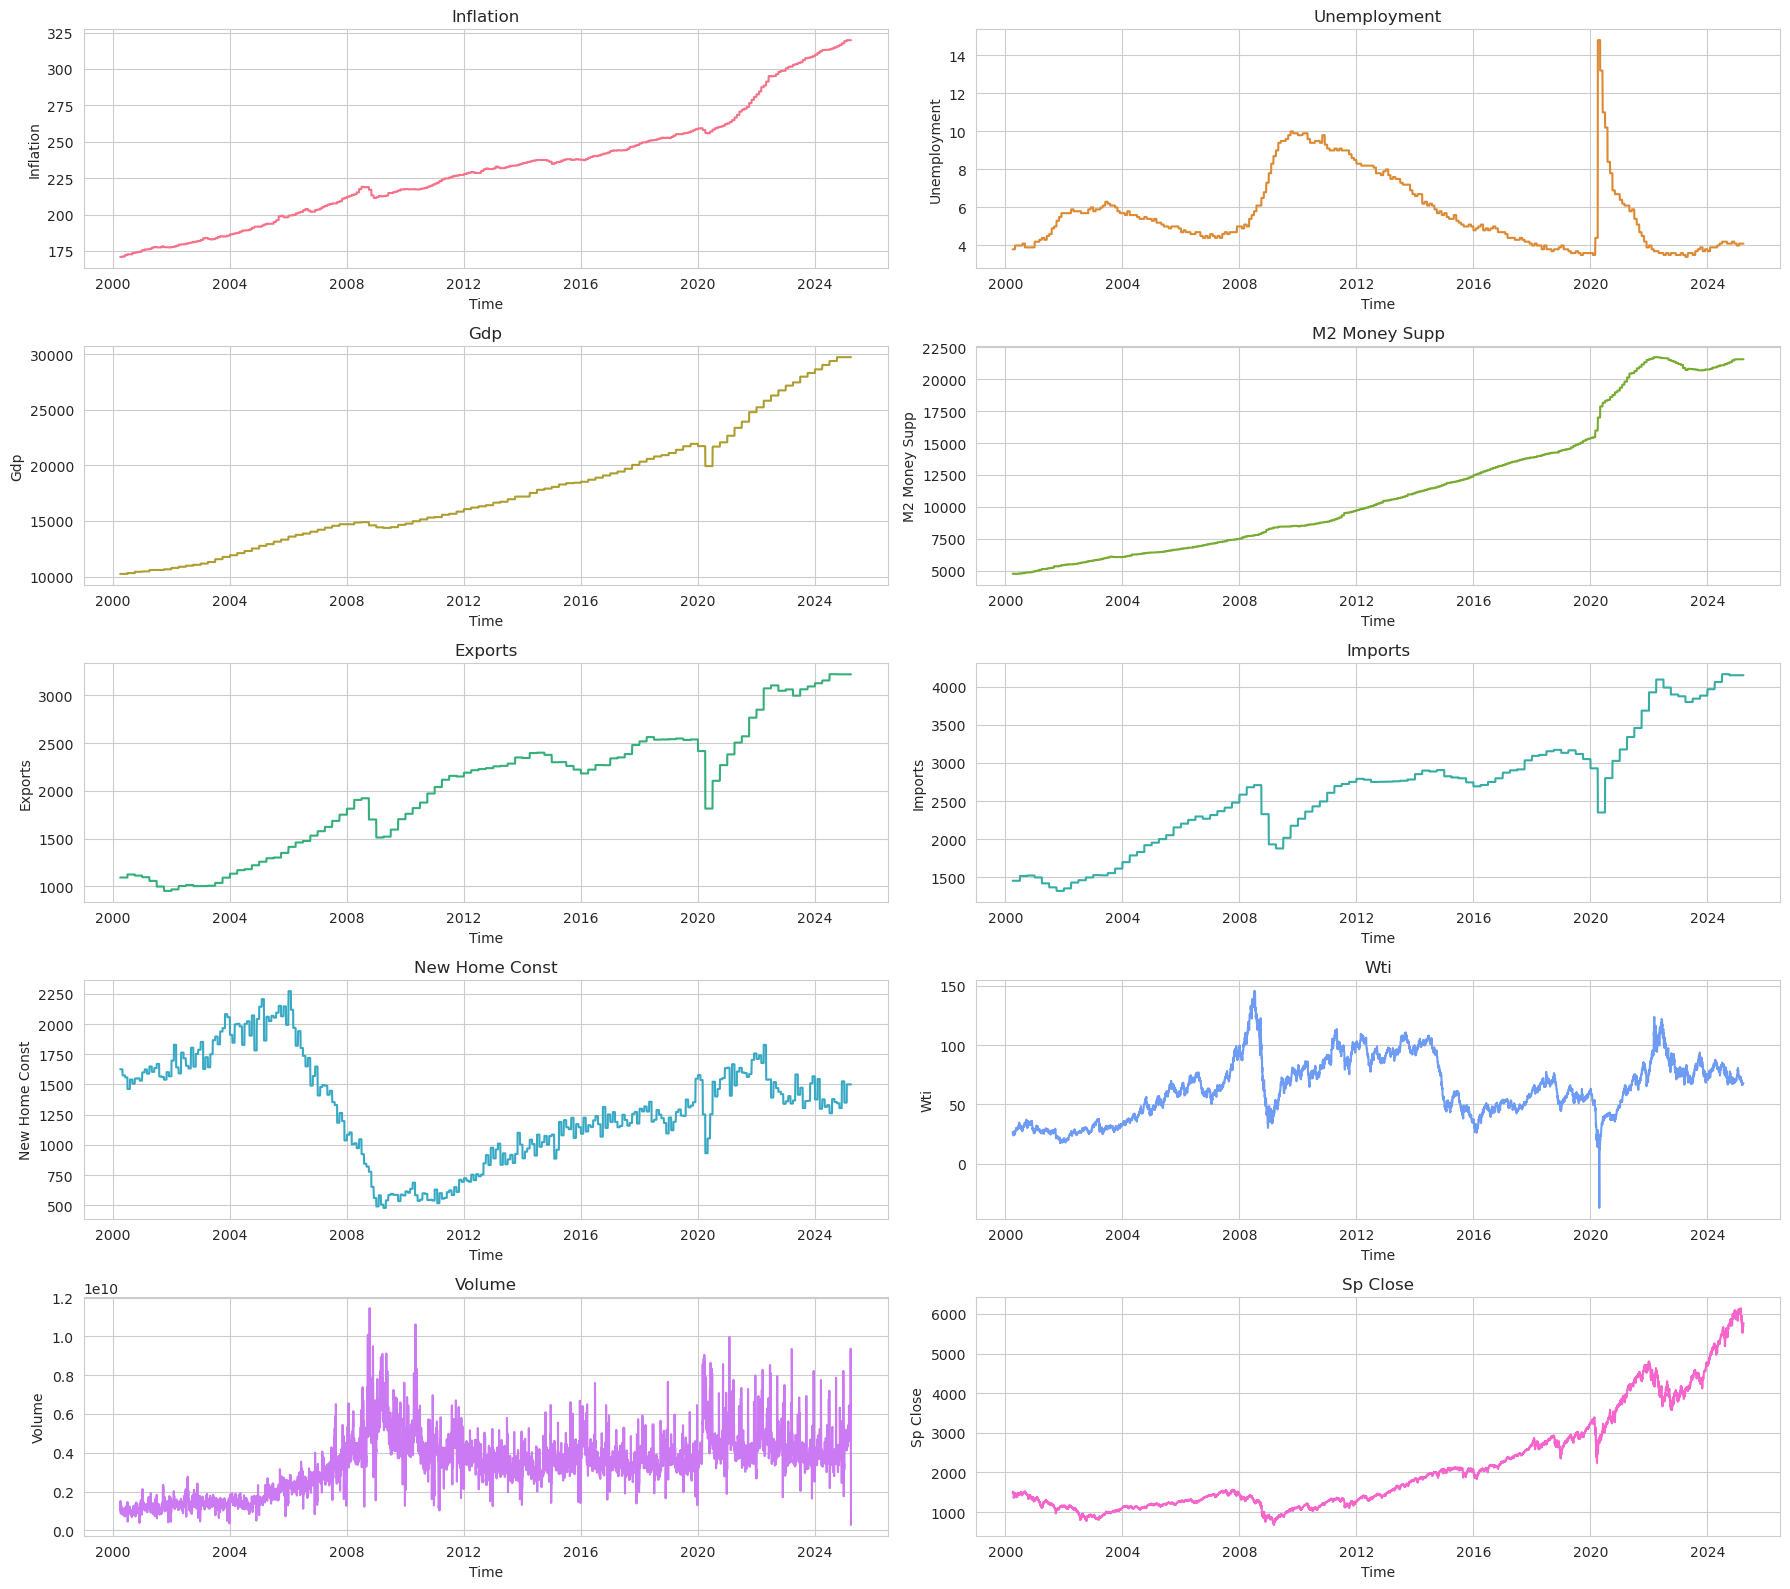

In [33]:
line_columns = ['inflation', 'unemployment', 'gdp', 'm2_money_supp', 'exports',
       'imports', 'new_home_const', 'wti', 'volume', 'sp_close']
# Set figure size
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 16))  
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Colors from seaborn
palette = sns.color_palette("husl", len(axes))

# Plot each column
for i, col in enumerate(line_columns):
    sns.lineplot(x=df['date'], y=num[col], ax=axes[i], color=palette[i])
    axes[i].set_title(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel(col.replace("_", " ").title())

# Adjust layout
plt.tight_layout()
plt.show()

### Oil price

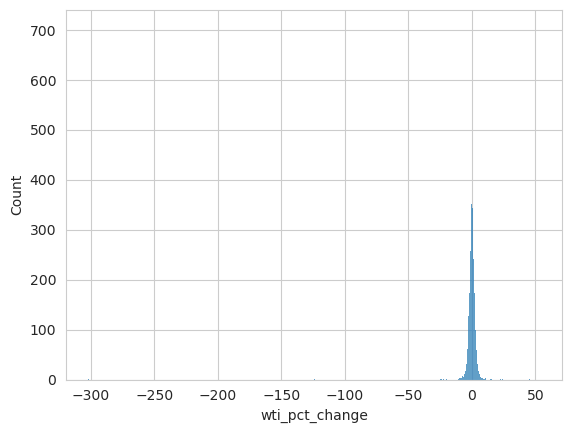

In [34]:
# checking individual plot
sns.histplot(x=df["wti_pct_change"])
plt.show()

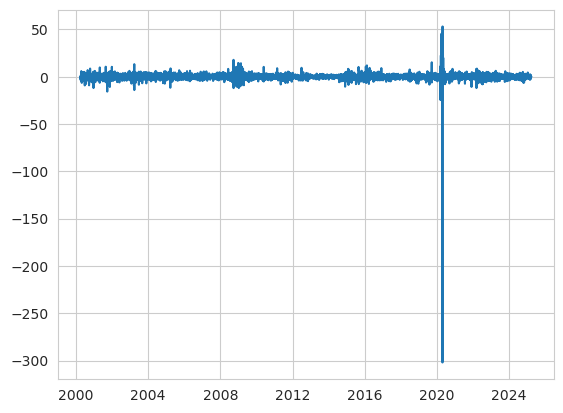

In [35]:
plt.plot(df["date"], df["wti_pct_change"])
plt.show()

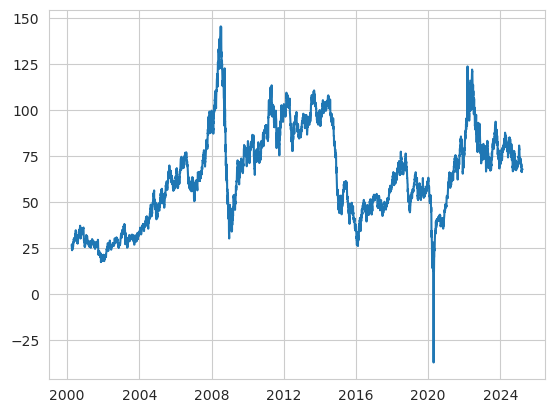

In [36]:
plt.plot(df["date"], df["wti"])
plt.show()

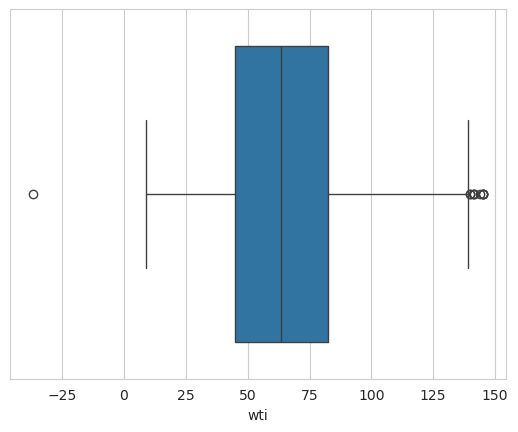

In [37]:
sns.boxplot(x=df["wti"])
plt.show()

## Correlation matrix

In [38]:
num

,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,sp_close
0,170.900,3.8,10247.720,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1498.579956
1,170.900,3.8,10247.720,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134,1505.969971
2,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.12,25.46,1.515460e+09,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,-0.746362,1494.729980
3,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,28.41,25.76,1.110300e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,-0.492396,1487.369995
4,170.900,3.8,10247.720,6.02,5.93,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.15,25.51,1.008000e+09,0.0,0.0,0.0,0.0,0.0,0.0,-0.970497,0.939240,1501.339966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.65,19.90,67.84,4.660090e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.079850,5675.290039
6599,319.775,4.1,29719.647,4.33,4.24,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.80,67.84,4.678420e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.218489,5662.890137
6600,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.28,67.84,9.367460e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.082465,5667.560059
6601,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,17.48,67.84,4.517990e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.764600,5767.569824


In [39]:
cor_mat_pearson = num.corr(method='pearson').round(2)

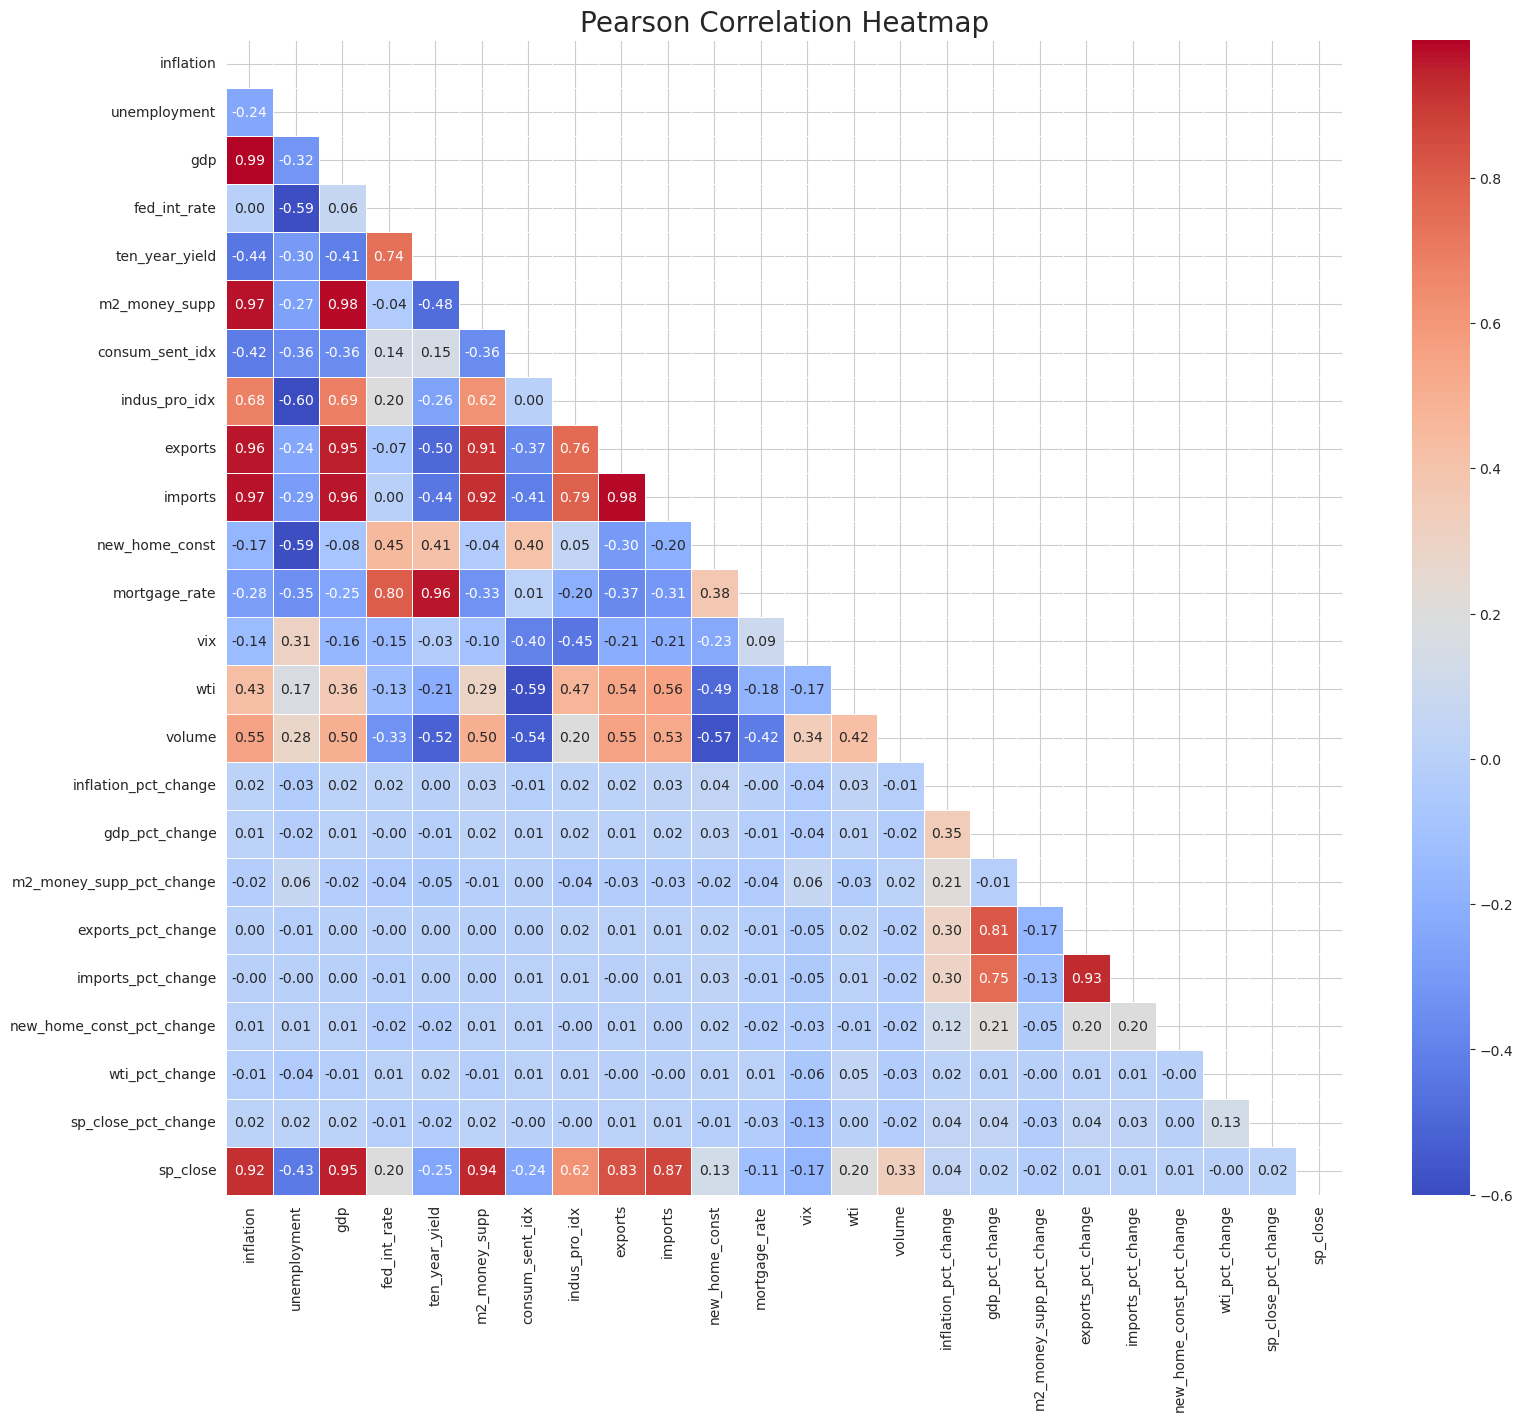

In [55]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cor_mat_pearson, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap with the mask
sns.heatmap(cor_mat_pearson, mask=mask, annot=True, cmap="coolwarm", 
linewidths=0.5, fmt=".2f")

plt.title("Pearson Correlation Heatmap", fontsize=20)
#plt.savefig("../plot/pearson_heatmap.png", dpi=600, bbox_inches="tight")
plt.show()

**Multicolinearity**
- The columns which have more than 0.90 correlation will be removed before training ML models. 
- XGBoost Regressor will help removing columns based on importance.
- Correlated columns:
    - `gdp` & `inflation`
    - `m2_money_supp` & `inflation`
    - `m2_money_supp` & `gdp`
    - `exports` & `inflation`
    - `exports` & `gdp`
    - `exports` & `m2_money_supp`
    - `imports` & `gdp`
    - `imports` & `m2_money_supp`
    - `imports` & `inflation`
    - `imports` & `exports`
    - `mortgage_rate` & `ten_year_yield`
    - `imports_pct_change` & `exports_pct_change`

## Analysis of categorical data

In [41]:
cat

,date,month,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,2000-04-01,Apr,Neutral,Slowdown,Low,Hawkish,Stable,Q2
1,2000-04-03,Apr,Neutral,Slowdown,Low,Hawkish,Stable,Q2
2,2000-04-04,Apr,Neutral,Slowdown,Low,Hawkish,Stable,Q2
3,2000-04-05,Apr,Neutral,Slowdown,Low,Hawkish,Stable,Q2
4,2000-04-06,Apr,Neutral,Slowdown,Low,Hawkish,Stable,Q2
...,...,...,...,...,...,...,...,...
6598,2025-03-19,Mar,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6599,2025-03-20,Mar,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6600,2025-03-21,Mar,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6601,2025-03-24,Mar,Neutral,Slowdown,Low,Hawkish,Stable,Q1


In [42]:
cat = cat.drop(columns=["date", "month"])

In [43]:
cat["market_trend"].value_counts()

market_trend
Neutral    6114
Bearish     269
Bullish     220
Name: count, dtype: int64

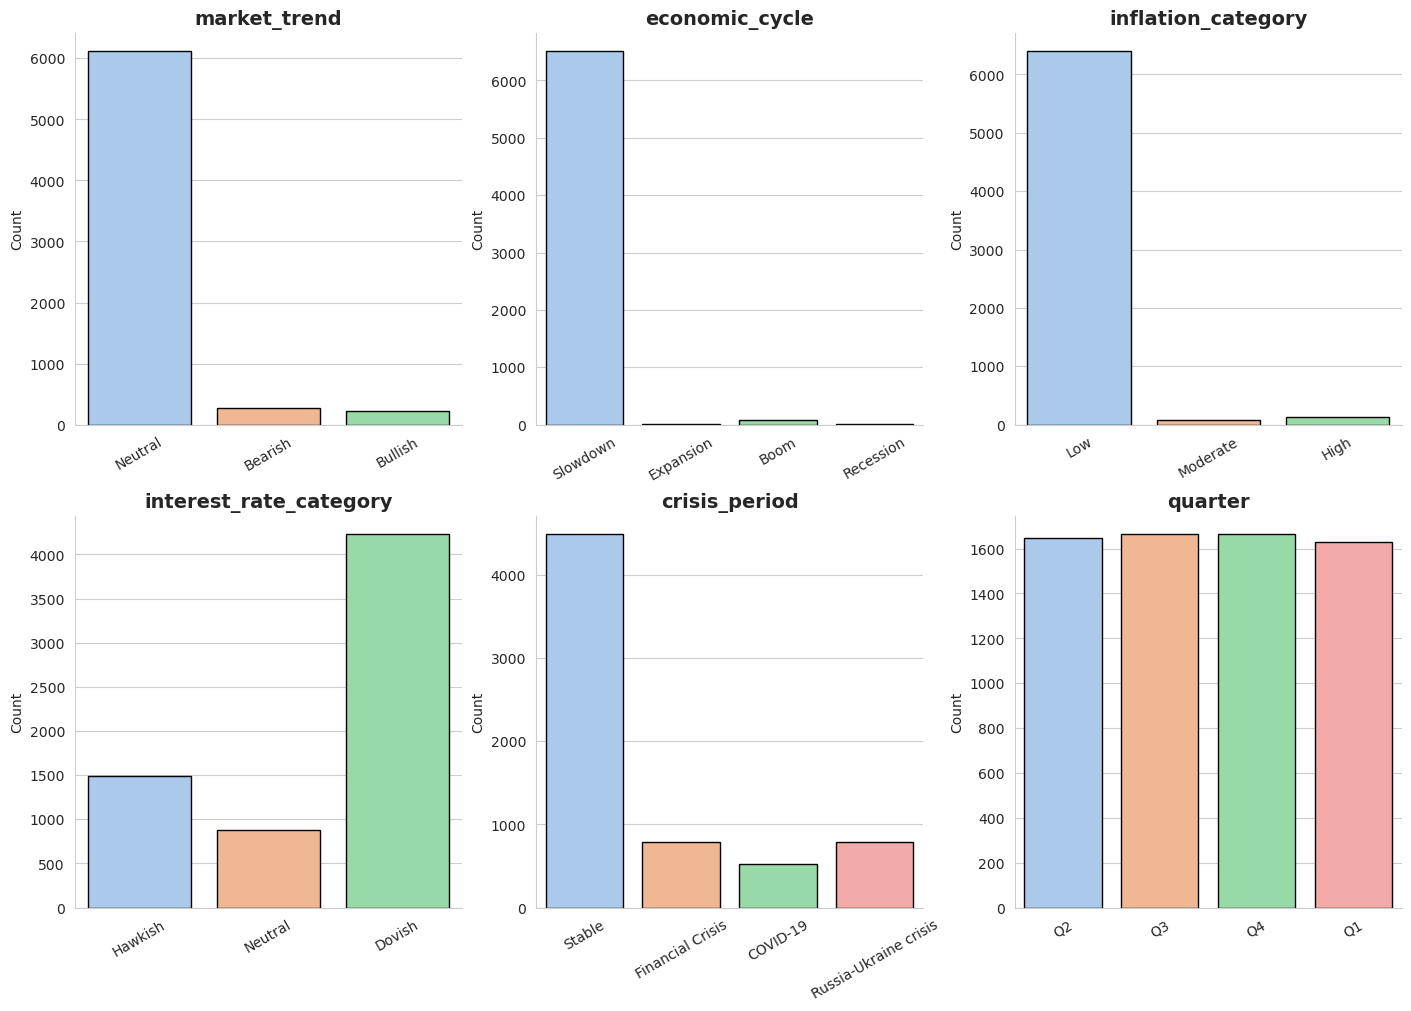

In [44]:
# Set Seaborn style
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot count plots
for i, col in enumerate(cat.columns):
    ax = axes[i]
    sns.countplot(data=cat, x=col, palette=palette, ax=ax, edgecolor='black')
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=30)  # Rotate x labels for better readability

# Show plot
plt.show()

**Insights**
- I have to ignore `market_trend`, `economic_cycle`, `quarter` for the final data to train the model.
- I will take only `inflation_category`, `interest_rate_category` and `crisis_period`

In [45]:
cat

,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,Neutral,Slowdown,Low,Hawkish,Stable,Q2
1,Neutral,Slowdown,Low,Hawkish,Stable,Q2
2,Neutral,Slowdown,Low,Hawkish,Stable,Q2
3,Neutral,Slowdown,Low,Hawkish,Stable,Q2
4,Neutral,Slowdown,Low,Hawkish,Stable,Q2
...,...,...,...,...,...,...
6598,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6599,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6600,Neutral,Slowdown,Low,Hawkish,Stable,Q1
6601,Neutral,Slowdown,Low,Hawkish,Stable,Q1


## Prepare data for machine learning models

In [46]:
df_ml = df.drop(columns=["market_trend", "economic_cycle", "quarter"])

In [47]:
df_ml

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category,interest_rate_category,crisis_period,sp_close_pct_change,sp_close
0,2000-04-01,170.900,3.8,10247.720,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.11,26.86,1.227400e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,0.000000,1498.579956
1,2000-04-03,170.900,3.8,10247.720,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.03,26.28,1.021700e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Low,Hawkish,Stable,0.493134,1505.969971
2,2000-04-04,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.12,25.46,1.515460e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,Low,Hawkish,Stable,-0.746362,1494.729980
3,2000-04-05,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,28.41,25.76,1.110300e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,Low,Hawkish,Stable,-0.492396,1487.369995
4,2000-04-06,170.900,3.8,10247.720,6.02,5.93,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.15,25.51,1.008000e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-0.970497,Low,Hawkish,Stable,0.939240,1501.339966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2025-03-19,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.65,19.90,67.84,4.660090e+09,Mar,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,1.079850,5675.290039
6599,2025-03-20,319.775,4.1,29719.647,4.33,4.24,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.80,67.84,4.678420e+09,Mar,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,-0.218489,5662.890137
6600,2025-03-21,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.28,67.84,9.367460e+09,Mar,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,0.082465,5667.560059
6601,2025-03-24,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,17.48,67.84,4.517990e+09,Mar,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,1.764600,5767.569824


In [48]:
# save the data
df_ml.to_csv("../data/financial_data_ml.csv")